In [8]:
%load_ext autoreload
%autoreload 2


from util import *
from kmeans import algorithm
from pprint import pprint


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:

problem_file = '../../alg_test_problems_20240429/TEST_K50_1.json'
timelimit = 10


with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
# try:
    # Run algorithm!
solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
# except Exception as e:
#     exception = f'{e}'

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

# checked_solution

Best obj = 3882.12
True True True


/home/jung/anaconda3/envs/ogc2024/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AssertionError: 

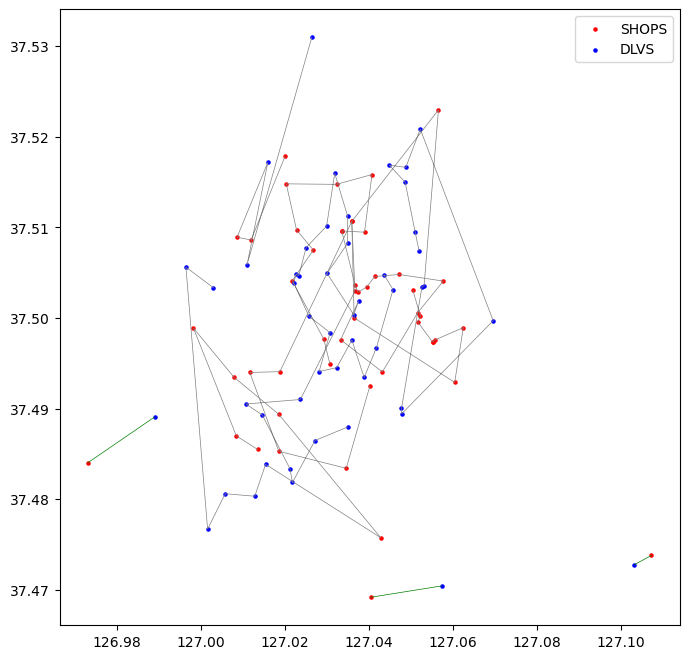

: 

In [ ]:
draw_route_solution(ALL_ORDERS, checked_solution)

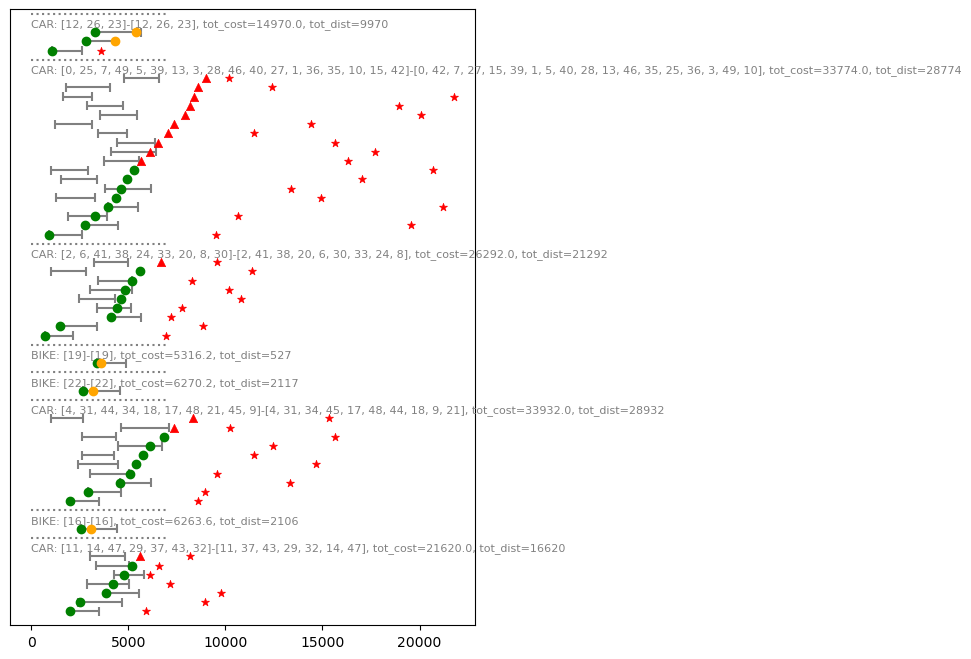

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)